In [7]:
import pandas as pd

# Đọc dữ liệu

data = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Hoc_May\dulieu\tseries\train.csv")

# Lọc dữ liệu chỉ chứa ngày thứ 4
tuesday_data = data[data['Publication_Day'] == 'Wednesday']

# Kiểm tra dữ liệu
tuesday_data.head()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
13,13,Gadget Geek,Episode 37,92.50,Technology,68.42,Wednesday,Afternoon,87.87,0.0,Neutral,50.93591
19,19,Sport Spot,Episode 61,51.60,Sports,61.60,Wednesday,Evening,90.41,1.0,Positive,14.96035
20,20,Funny Folks,Episode 100,54.67,Comedy,45.47,Wednesday,Afternoon,NaN,2.0,Neutral,29.22750
22,22,Business Briefs,Episode 54,66.22,Business,62.81,Wednesday,Night,88.86,0.0,Neutral,47.60142
25,25,Tech Trends,Episode 97,105.35,Technology,55.03,Wednesday,Afternoon,76.12,1.0,Neutral,99.15797


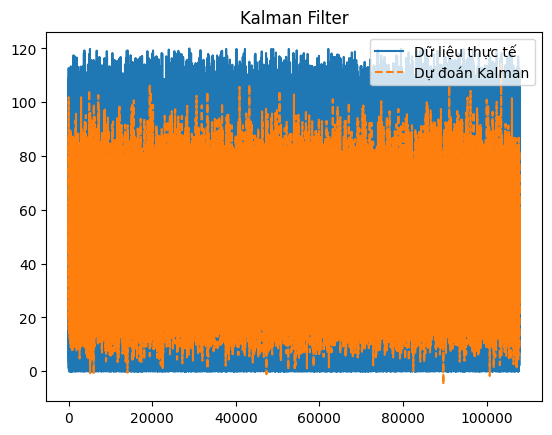

In [ ]:
from filterpy.kalman import KalmanFilter
import numpy as np

# Tạo đối tượng Kalman Filter
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0., 0.])  # Giả định trạng thái ban đầu (position, velocity)
kf.P *= 1000.  # Độ không chắc chắn ban đầu
kf.F = np.array([[1., 1.], [0., 1.]])  # Ma trận chuyển động
kf.H = np.array([[1., 0.]])  # Ma trận đo
kf.R = np.array([[5.]])  # Độ sai số đo
kf.Q = np.array([[0.1, 0.], [0., 0.1]])  # Độ nhiễu của mô hình

# Giả sử chuỗi thời gian là dữ liệu giá trị của một cột nào đó trong `tuesday_data` thứ 4
measurements = tuesday_data['Listening_Time_minutes'].values


# Dự đoán với Kalman Filter
predicted_values = []
for z in measurements:
    kf.predict()
    kf.update(z)
    predicted_values.append(kf.x[0])

# Trực quan hóa kết quả
import matplotlib.pyplot as plt

plt.plot(measurements, label='Dữ liệu thực tế')
plt.plot(predicted_values, label='Dự đoán Kalman', linestyle='--')
plt.legend()
plt.title("Kalman Filter")
plt.show()


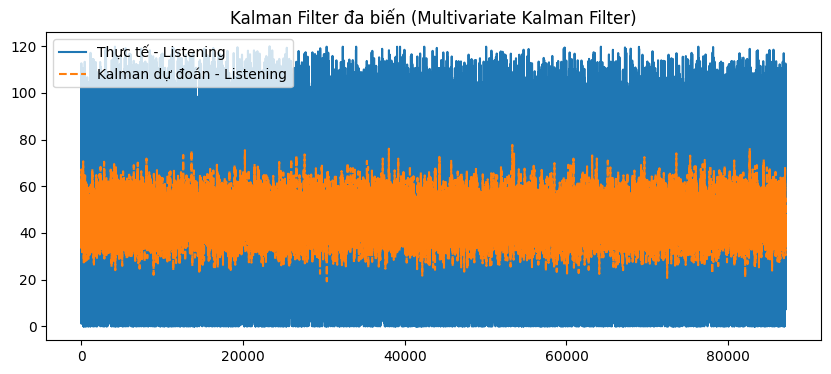

In [9]:
from filterpy.kalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
data = tuesday_data[['Listening_Time_minutes', 'Guest_Popularity_percentage']].dropna()
measurements = data.values

# Tạo Kalman Filter với trạng thái 2 biến
kf = KalmanFilter(dim_x=2, dim_z=2)
kf.x = np.array([0., 0.])  # Trạng thái ban đầu: time_listen, guest_popularity
kf.P *= 1000.
kf.F = np.array([[1., 0.], [0., 1.]])  # Không giả định mối liên hệ động học
kf.H = np.eye(2)  # Quan sát trực tiếp cả 2 biến
kf.R = np.eye(2) * 5.
kf.Q = np.eye(2) * 0.1

# Dự đoán
predicted = []
for z in measurements:
    kf.predict()
    kf.update(z)
    predicted.append(kf.x.copy())

predicted = np.array(predicted)

# Trực quan hóa
plt.figure(figsize=(10,4))
plt.plot(data['Listening_Time_minutes'].values, label='Thực tế - Listening')
plt.plot(predicted[:,0], label='Kalman dự đoán - Listening', linestyle='--')
plt.legend()
plt.title("Kalman Filter đa biến (Multivariate Kalman Filter)")
plt.show()


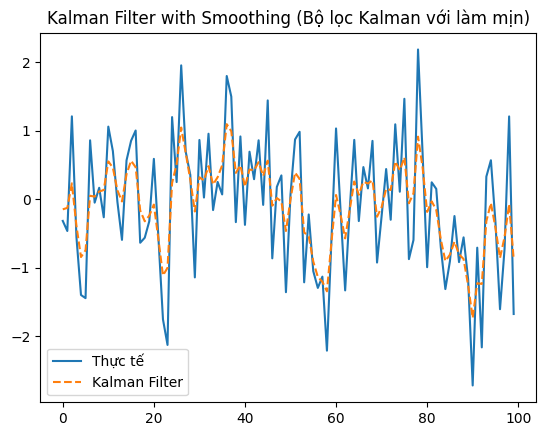

In [11]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
observations = np.random.normal(0, 1, [100, 1])  # Dữ liệu quan sát ngẫu nhiên

# Khởi tạo Kalman Filter
kf = KalmanFilter(transition_matrices=[1],  # Ma trận chuyển trạng thái
                  observation_matrices=[1],  # Ma trận quan sát
                  initial_state_mean=0,      # Giá trị trung bình ban đầu
                  initial_state_covariance=1)  # Độ lệch chuẩn ban đầu
smoothed_state_means, _ = kf.smooth(observations)

# Vẽ biểu đồ
plt.plot(observations, label='Thực tế')
plt.plot(smoothed_state_means, label='Kalman Filter', linestyle='--')
plt.legend()
plt.title('Kalman Filter with Smoothing (Bộ lọc Kalman với làm mịn)')
plt.show()